# Project 3: UCI Car Data 

In this project we do a basic EDA and then follow the instructions below.  Here is the column name with their features.

<br>
</br>


**Attribute Information via [UCI database](https://archive.ics.uci.edu/ml/datasets/Automobile)**:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [174]:
import numpy as np
import pandas as pd
import statistics as stats
import seaborn as sns

column_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/MAT5001/main/Project_3/M10_Data.csv', names = column_names)

#check the dimensions of the data and display the data
print('The dimensions of the data are: ', df.shape)
df.head()

The dimensions of the data are:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [175]:
#check if we have any empty data
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [176]:
#check how many unique values we have in each column
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [177]:
#check the type of each feature
#we note that some numeric values appear as object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [178]:
#count how many question marks there are
print(df[df == '?'].count())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [179]:
#replace '?' with NaN
df.replace('?', np.NaN, inplace=True)
print(f"There are currently %s question marks." %df[df == '?'].count().sum())

There are currently 0 question marks.


In [180]:
#we set aside the continuous data to turn it into numeric data (since, as shown above, not all of it is in numeric format)
for_boxes = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# convert for_boxes to numeric and check that it is so
df[for_boxes] = df[for_boxes].apply(pd.to_numeric)
df[for_boxes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd96debd6d0>,
      dtype=object)

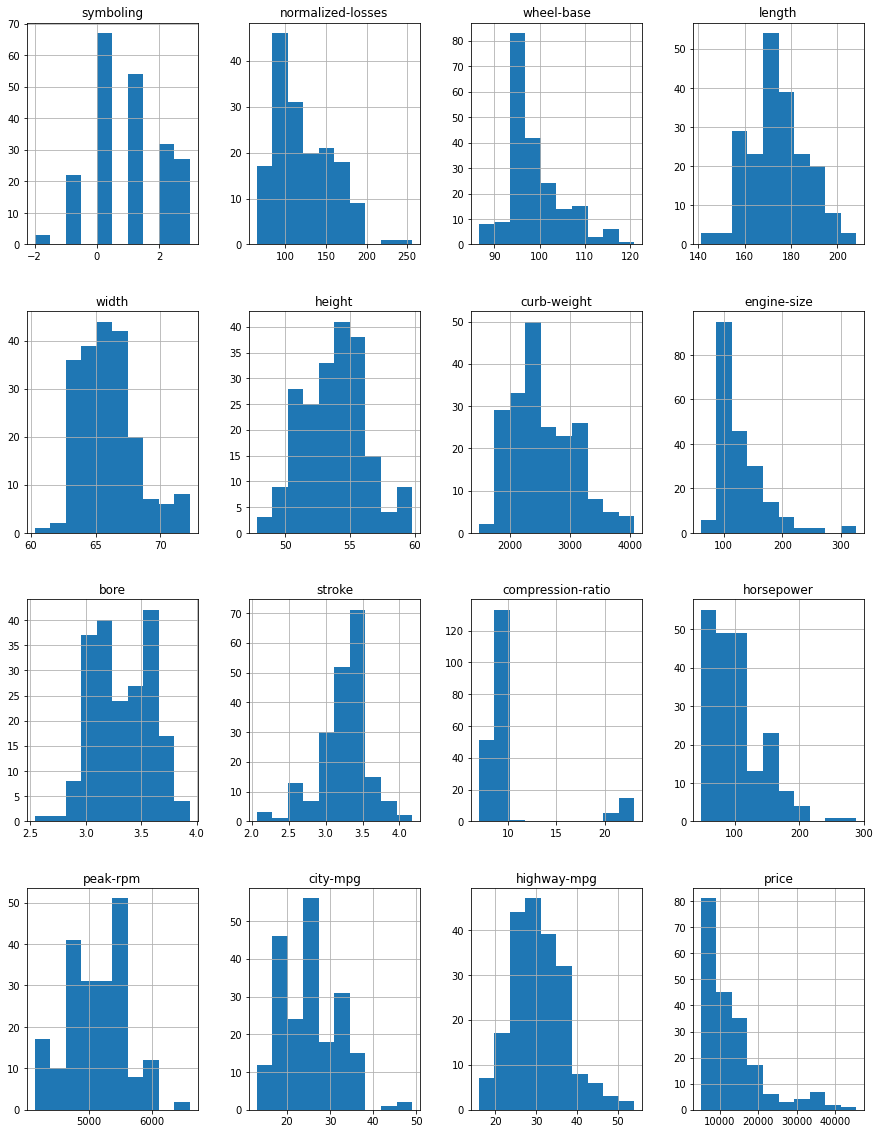

In [181]:
#the first things we do is get the histograms of the data
df.hist(figsize = (15,20))

We note from above:
* many cars have a curb-weight between 2000 and 3200
* the largest engine size is 100
* the price is a pareto distribution


Below we look at some specific categorical data. The code was taken from [here](https://www.kaggle.com/shubhamsinghgharsele/exploratory-data-analysis-on-automobile-dataset).

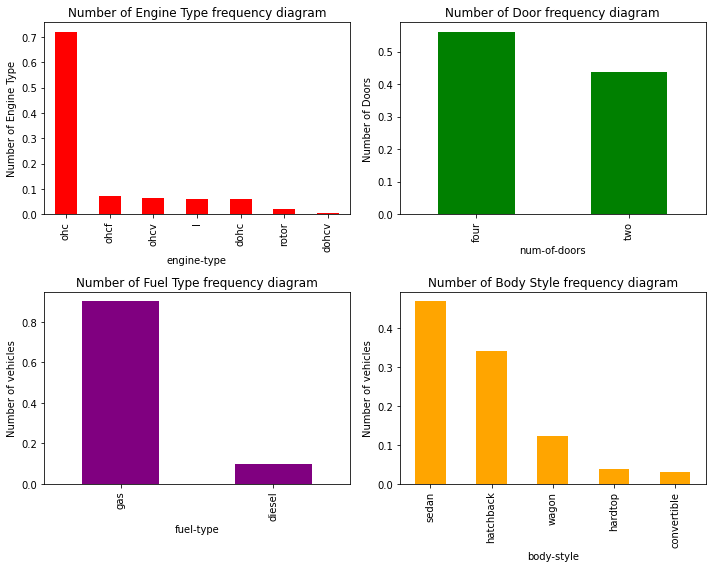

In [182]:
import matplotlib.pyplot as plt

df_automobile = df
plt.figure(1)
plt.subplot(221)
df_automobile['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df_automobile['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df_automobile['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df_automobile['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

We see from the above:
* most engine types are ohc
* there is about as many four door cars as two door cars
* most vehicles use gas, not diesel
* most vehicles are either sedans or hatchbacks

###Boxplots

Below we attempt to do boxplots. Initially we found that the non-scaled data made it difficult to read and/or interpret the plot, as such, we show three different scalings (log, min-max, and normalized).  

We glean from these that engine-size, stroke, compression-size, and price have a fair amount of outliers.  This is something to be careful of in our analysis. We may want to drop anything that is too far away from the rest of the data, although we should verify that it is an anomaly first. 

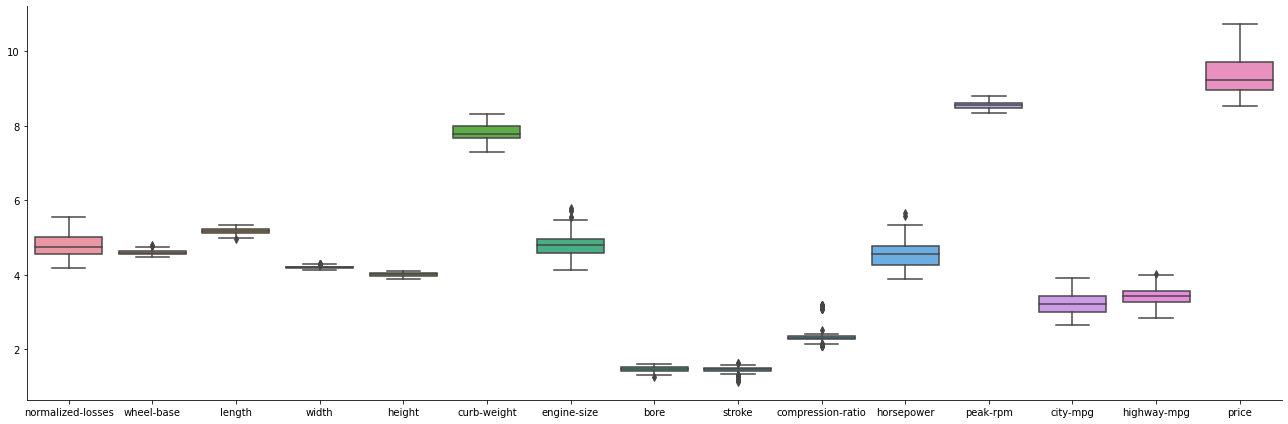

In [183]:
#the boxplots for the non-transformed data was difficult to read since there were different scales
#below we to a log transform and a min-max transform to test out the boxplots and see what is relevant
for_boxes = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']



# apply log(x+1) element-wise to a subset of columns
to_log = for_boxes
df_log = df[to_log].applymap(lambda x: np.log(x+1))

#vals = df[for_boxes]
sns.catplot(data=df_log , kind='box',height = 6, aspect = 3)

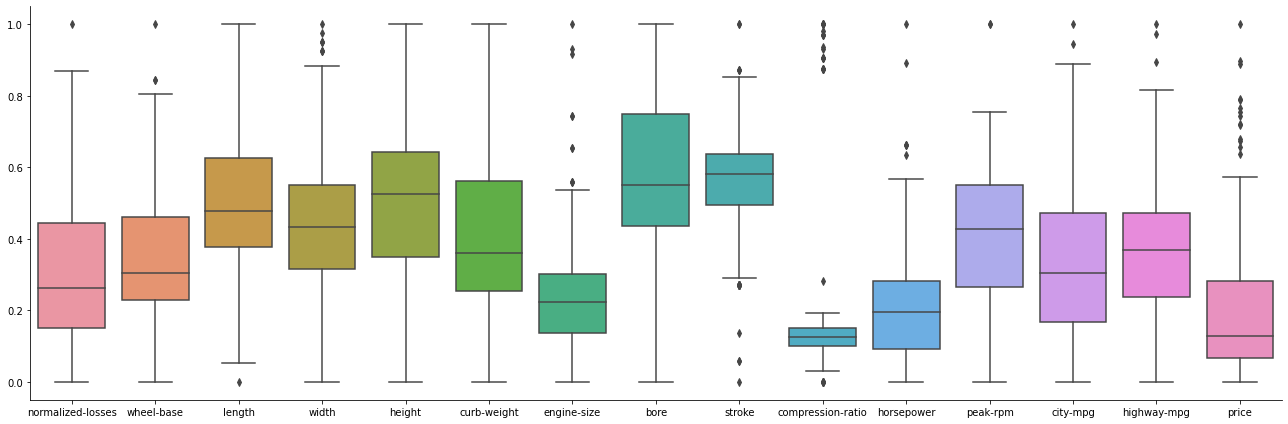

In [184]:
mm_df = df[for_boxes]
minmax_df=(mm_df-mm_df.min())/(mm_df.max()-mm_df.min())
#vals = df[for_boxes]
sns.catplot(data=minmax_df , kind='box',height = 6, aspect = 3)

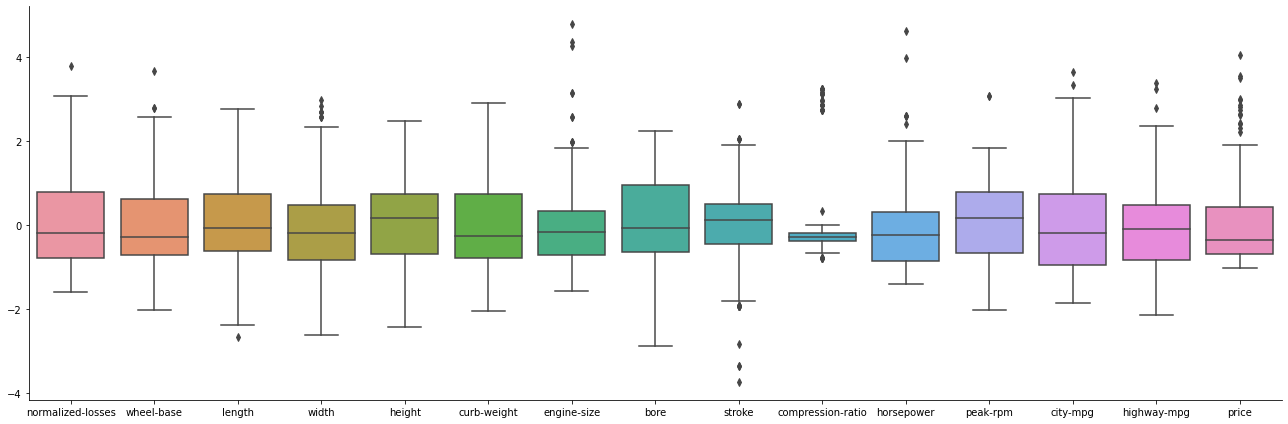

In [185]:
normalized_df=(mm_df-mm_df.mean())/mm_df.std()
sns.catplot(data=normalized_df , kind='box',height = 6, aspect = 3)

We attempted three different scales of boxplots.  The min-max and normalized scales show us a better angle. We see that engine-size, stroke, horsepower, and price have a lot of outliers.

In [186]:
#check the statistics for the continuous variables
df[for_boxes].describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


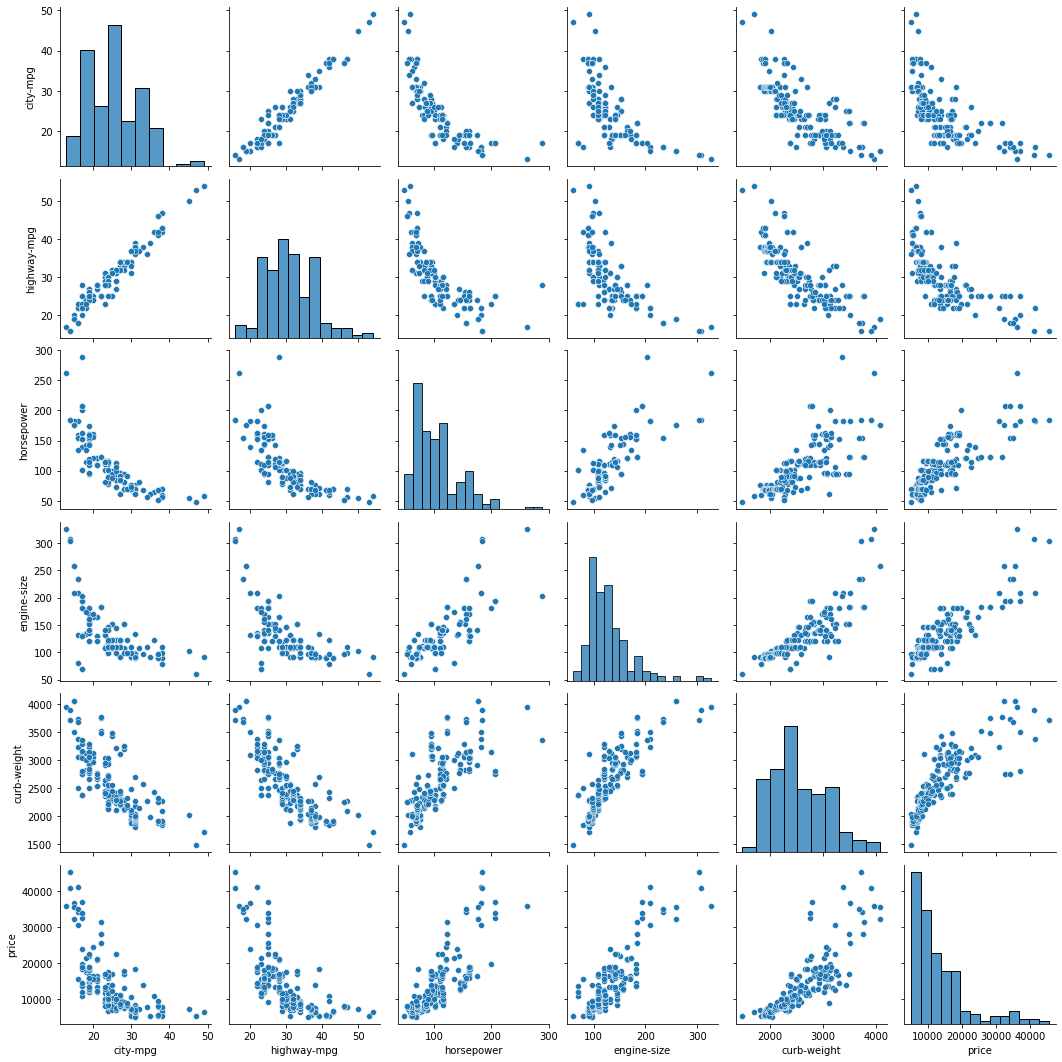

In [187]:
g = sns.pairplot(df_automobile[["city-mpg", "highway-mpg", "horsepower", "engine-size", "curb-weight","price"]], diag_kind="hist")

We see from the above:
* price is inversely proportional to mpg
* price is highly correlated to horsepower and engine-size
* highway and city mpg are so highly correlated we may want to exclude one and view it as multi-collinearity

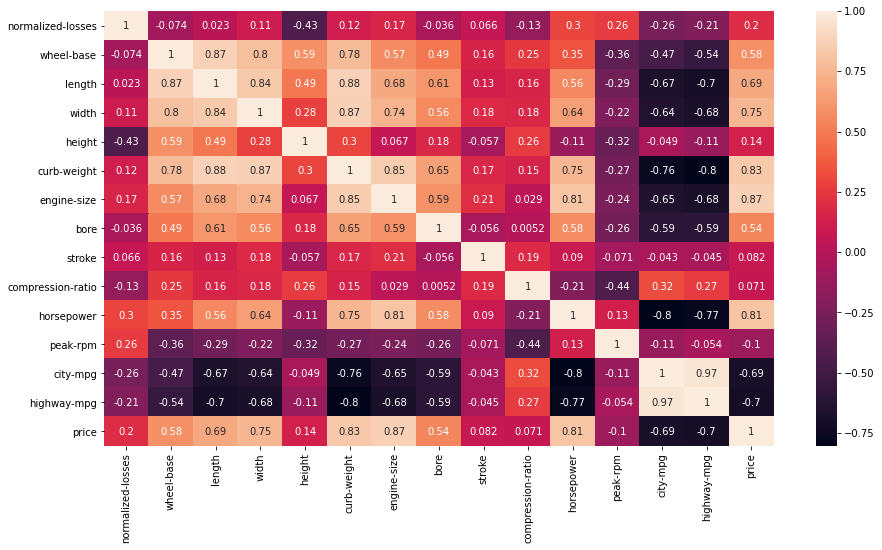

In [188]:
#note - only numeric values are in the correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(df[for_boxes].corr(), annot = True)
plt.show()

We note that:
* city-mpg is highly correlated to many other data points
* horsepower and price have an extremely high correlation (as does engine-size and price)
* width, length, and height might be better as a combined feature, since they are so related.

In [189]:
#output the individual parts of the categorical data to view it
#here we check that the make matches the information on UCI
print(df['make'].value_counts())

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64


##EDA Summary

Overall, we see that our data will need to be transformed and cleaned to be used. There are a mix of numeric and categorical variables, each of which needs to be checked for consistency, NaNs (or other indicators of missing value), outliers, and the distribution.  

Since this is just a toy model, we don't have a target question, and thus don't have anymore insight into which data might be left out (outside of our previous observation about multicollinearity).

# Questions

**Question 1:**
Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm?

Any data that is out of sync (in terms of size, outliers, etc.) is a good candidate for feature scaling.  Since we would like to compare our data (as shown above in the boxplots), we would like to change all of the continuous data, which above is called "for_boxes".  We showed how this was done in three different formats above. We could also change num-of-doors to numbers to make our KNN imputation easier, but instead we will use 'most-frequent' for the imputation, so we will not convert it otherwise.

**Question 2:**
How many missing data values occur within number-of-doors and price?

In [190]:
print(f'Num of doors missing: %d' %df['num-of-doors'].isna().sum())
print(f'Price missing: %d' %df['price'].isna().sum())

Num of doors missing: 2
Price missing: 4


Here we use a knn imputer to test our data. Since we are trying to fill in price, and we know that engine size is highly correlated, we target engine size, filling in price this way.  It turns out to be an excellent approach with n = 3 an optimal option for the knn.  This idea and the code was sourced from [here](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/).


In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std

test_df = df[for_boxes]

X, y = test_df.drop('engine-size', axis=1), test_df['engine-size']
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>1 0.841 (0.066)
>3 0.857 (0.065)
>5 0.852 (0.064)
>7 0.852 (0.074)
>9 0.857 (0.069)


In [192]:
#we tested it several times and, in general, n = 3 || n = 5 were optimal (as shown above for KNNImputer)

getPrice = df['price'].to_numpy().reshape(-1,1)
imputer = KNNImputer(n_neighbors= 3)
output = imputer.fit_transform(getPrice)
df['price'] = output


In [193]:
#we use "most-frequent" for num-of-doors
#it works well with categorical data

getDoors = df['num-of-doors'].to_numpy().reshape(-1,1)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(getDoors)
imputed_doors = imp_mean.transform(getDoors)

df['num-of-doors'] = imputed_doors

**Question 3:**

Consider the **engine-size** and **stroke** variables: 
1. Describe the specific feature scaling method you would apply to each of them. 
2. Generate both a histogram and a boxplot for the original content of these two variables. 
3. Apply the prescribed feature scaling methods to the two variables 
4. Create histograms and boxplots that show the results of your feature scaling efforts.
5. Compare your newly created plots against the plots you created for the original content of the variables. 
6. Comment on whether your feature scaling efforts improved the distribution of the data. 
7. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

These are both continuous numeric variables, as such we can apply transforms such as standardization, normalization, or min-max.  We will perform normalization to our entire set of continuous data.

In [194]:
datum = ['engine-size','stroke']

df_original = df[datum]

#log10 scale as done above
# apply log(x+1) element-wise to a subset of columns
to_log = datum
df_log = df[to_log].applymap(lambda x: np.log(x+1))

#normalization
df_norm=(df_original-df_original.mean())/df_original.std()


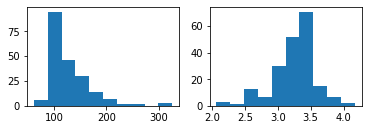

In [195]:
#original data charts

fig = plt.figure()
plt.subplot(221)
plt.hist(df['engine-size'])

plt.subplot(222)
plt.hist(df['stroke'])

plt.show()

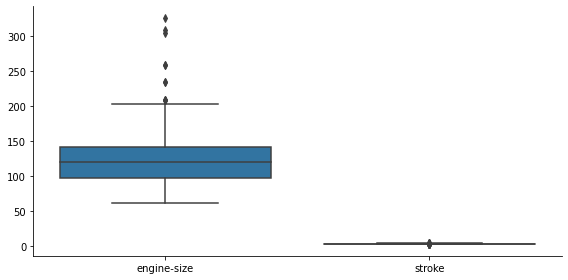

In [196]:
sns.catplot(data=df_original , kind='box',height = 4, aspect = 2)

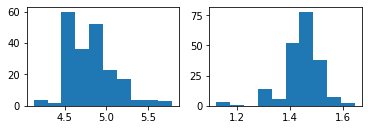

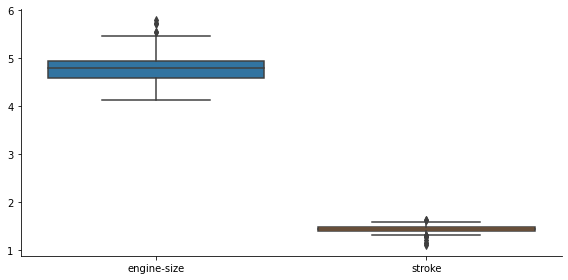

In [197]:
#log10 plot

fig = plt.figure()
plt.subplot(221)
plt.hist(df_log['engine-size'])

plt.subplot(222)
plt.hist(df_log['stroke'])

plt.show()

sns.catplot(data=df_log , kind='box',height = 4, aspect = 2)

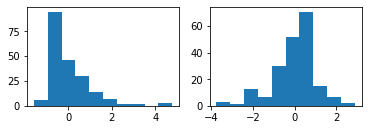

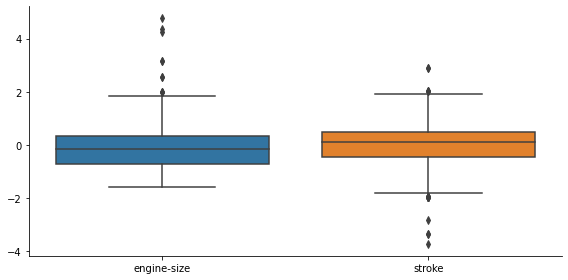

In [198]:
#log10 plot

fig = plt.figure()
plt.subplot(221)
plt.hist(df_norm['engine-size'])

plt.subplot(222)
plt.hist(df_norm['stroke'])

plt.show()

sns.catplot(data=df_norm , kind='box',height = 4, aspect = 2)

When comparing the original data to log10 to normed data - the only major difference is that it is easier to see in comparison.  While the log10 does look a little different, it maintains the overall distribution.  In short, it seems reasonable to do either transform when comparing results.

**Question 4:**

Consider the **symboling**, **make**, and **engine-type variables**:
1. For each variable, specify whether its content is numeric/continuous, numeric/discrete, 
categorical/nominal, or categorical/ordinal
2. For each variable, describe the methodology you would employ for purposes of preparing its data 
values for use within a machine learning algorithm.
3. Apply your prescribed data preparation methodologies to the three variables. Show a sample of your results.




1. Symboling is a categorical/ordinal variable.  Make is a categorical/nominal variable.  Engine-type is a categorical/nominal variable.

2. We could use OneHotEncoding or getdummies if there are a reasonable amount of each category (e.g. not for Make because, as shown in the EDA, there are some that have very few instances), or we could use binning (such as "cars from USA", "cars from Asia" - if that were relevant to our question), or we could use "most-frequent", or we could use a KNNImputer.  We will use get_dummies on symboling and a KNNImputer on Make and Engine-type (with code from [here](https://stackoverflow.com/a/64907828)).



In [199]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

#create a subset to work with
df_set = df[['make','engine-type']]

#convert to numbers using LabelEncoder
df_set = df_set.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

#impute with n = 1 so that there are no averages taken
imputer = KNNImputer(n_neighbors=1)
bob = imputer.fit_transform(df_set)

#replace the data in the original dataframe
df[['make','engine-type']] = pd.DataFrame(bob, columns=['make','engine-type'])


In [200]:
#do the get_dummies
#start with getting our data
df_dummies = df['symboling']

#do the dummies with a prefix
df_dummies = pd.get_dummies(df_dummies,prefix='symbol')

#insert back in
df.drop('symboling',axis = 1, inplace=True)
df[['symbol_-2','symbol_-1',	'symbol_0',	'symbol_1',	'symbol_2',	'symbol_3']] = df_dummies
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symbol_-2,symbol_-1,symbol_0,symbol_1,symbol_2,symbol_3
0,NaN,0.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,0.0,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,0,1
1,NaN,0.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,0.0,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,0,1
2,NaN,0.0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,5.0,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,0,1,0,0
3,164.0,1.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3.0,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,0,0,1,0
4,164.0,1.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,3.0,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,0,0,1,0


**Question 5:**

Consider the **wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, horsepower, peak-rpm, and city-mpg** variables. 

Reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how 
many orthogonal features your approach has generated as well as how much variability is explained by 
each of your new features.


The data first must be scaled and cleaned (pca does not allow NaNs). We use a normalized scaled, a KNNImputer, and the following resources: [here](https://www.kaggle.com/kennydevarapalli/automobile-dataset-detailed-analysis) and [here](https://github.com/alicezheng/feature-engineering-book/blob/master/06.01_PCA_on_MNIST_digits.ipynb).


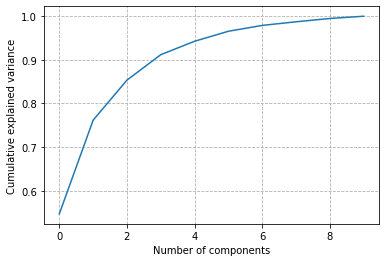

In [201]:
from sklearn.decomposition import PCA

#set up variables
vars = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']
df_pca = df[vars]

#scale our data
df_pca =(df_pca-df_pca.mean())/df_pca.std()

#get rid of any NaNs using imputation (since PCA can't handle it)
#impute with KNNImputer, as above, using our continuous data
imputer = KNNImputer(n_neighbors=5)
bob = imputer.fit_transform(df_pca)

#replace the data
df_pca[vars] = pd.DataFrame(bob, columns=vars)


pca1 = PCA().fit(df_pca)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True, linestyle = "--")

This shows us that we can get 95% of the features explained with 4 attributes.  This is what we will now choose.

In [202]:
#Approach 1: set it to 4 components, since that is clear from the chart

pca = PCA(n_components = 4)
x_pca = pca.fit_transform(df_pca)
df_pca_1 = pd.DataFrame(x_pca)

In [203]:
# Approach 2: Fit a PCA transformer to the dataset.
# The number of components is automatically chosen to account for at least 95% of the total variance.

pca_transformer = PCA(n_components=0.95)
pca_images = pca_transformer.fit_transform(df_pca)
explained_variance = pca_transformer.explained_variance_ratio_

print("The explained variance per column is: ", explained_variance)

The explained variance per column is:  [0.54670639 0.21480048 0.09197471 0.05834861 0.03081302 0.02292968]
